In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [4]:
# setting PassengerId  as index column
data.set_index("PassengerId", inplace = True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 11)

3. Check the basic details of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

4. Fill in all the missing values present in all the columns in the dataset

In [11]:
data.isna().sum()
#finding null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# Replacing missing values of Age with median value
data['Age']=data['Age'].fillna(data['Age'].median())

In [14]:
# Replacing missing values of Embarked with Mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [15]:
#Since too many missing values in cabin column can drop it
data=data.drop(['Cabin'],axis=1)

In [16]:
data.shape

(891, 10)

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

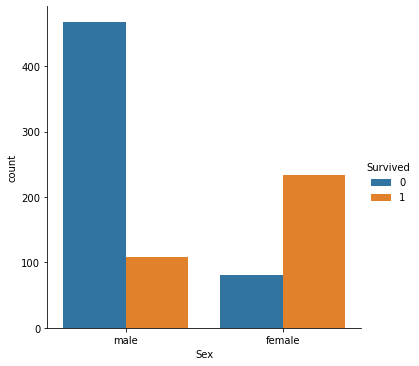

In [18]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = data)

In [19]:
data.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
#the graph tells us that more number of male passengers have died than female ones.

<AxesSubplot:xlabel='Survived', ylabel='count'>

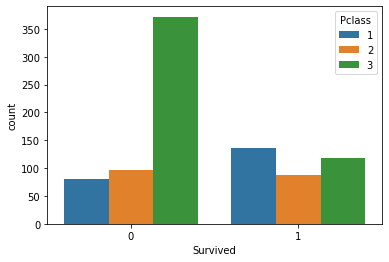

In [20]:
sns.countplot(x='Survived',hue='Pclass',data=data)

In [ ]:
#The graph tells us that Pclass 3 were more likely to be survived.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

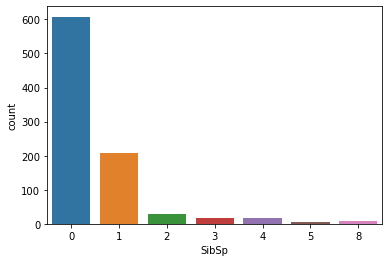

In [21]:
sns.countplot(x='SibSp',data=data)

In [ ]:
#the graph tells that more number of persons came alone (not accompanied by sibling or spouse)

<function matplotlib.pyplot.show(close=None, block=None)>

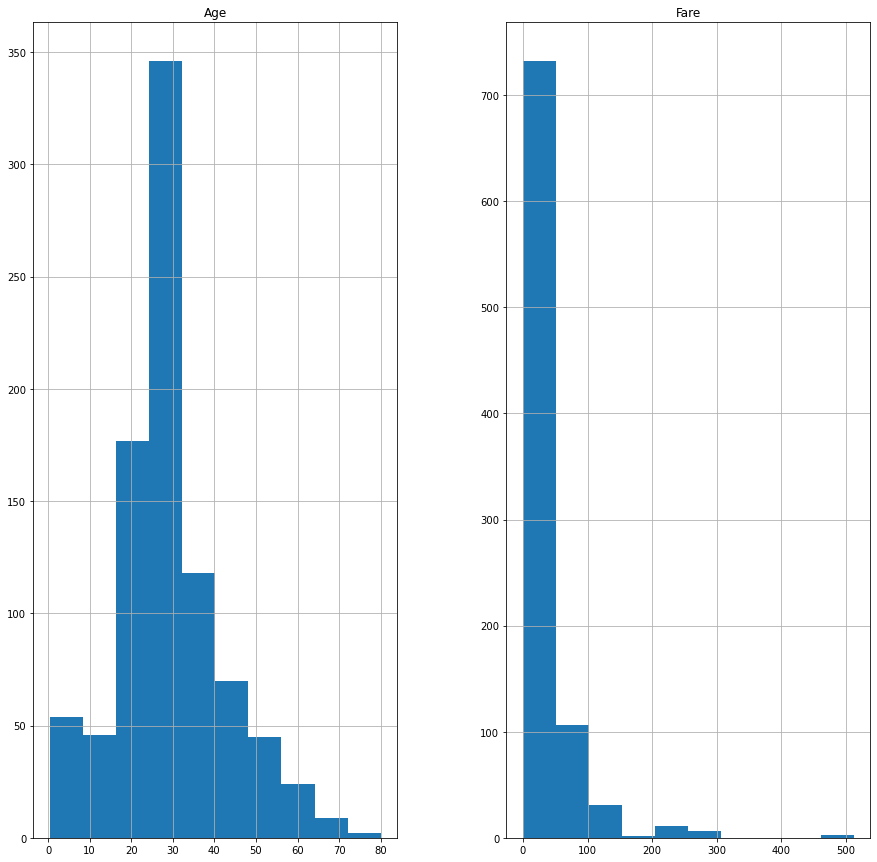

In [22]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,15))
plt.show

In [ ]:
#age column has good distribution
#Fare column value has outliers beyond 300

5. Check and handle outliers in at least 3 columns in the dataset

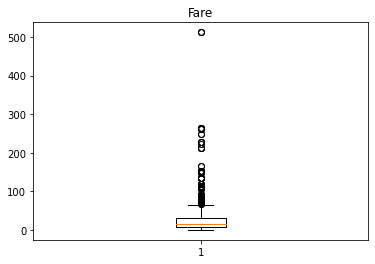

In [23]:
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show()

In [24]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q2=np.percentile(data['Fare'],50,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [25]:
print(q1,q2,q3)

7.9104 14.4542 31.0


In [26]:
data['Fare'].median()

14.4542

In [27]:
iqr=q3-q1
#interquatile range

In [28]:
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr

In [29]:
print(low_lim,up_lim)

-26.724 65.6344


In [30]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [31]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [32]:
ind1=data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [33]:
len(outlier)

116

In [ ]:
#since number of outliers are more ,cant drop these many rows.
#can replace the outliers with nearest logical value
#from the histogram its visible that outliers are beyond 300.


In [34]:
data['Fare'][data['Fare']<300].sort_values(ascending=False)

PassengerId
28     263.000
342    263.000
439    263.000
89     263.000
743    262.375
        ...   
634      0.000
414      0.000
823      0.000
733      0.000
675      0.000
Name: Fare, Length: 888, dtype: float64

In [35]:
data['Fare'][data['Fare']<300]=263

<ipython-input-35-7909943f1419>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'][data['Fare']<300]=263


In [36]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

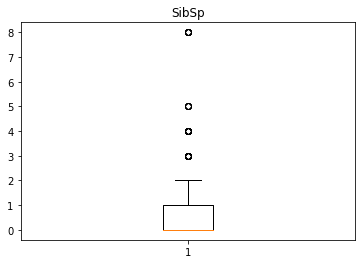

In [37]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')
plt.show()

In [38]:
q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [39]:
print(q1,q2,q3)

0.0 0.0 1.0


In [40]:
data['SibSp'].median()

0.0

In [41]:
iqr=q3-q1
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr

In [42]:
print(low_lim,up_lim)

-1.5 2.5


In [43]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [44]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [45]:
len(outlier)

46

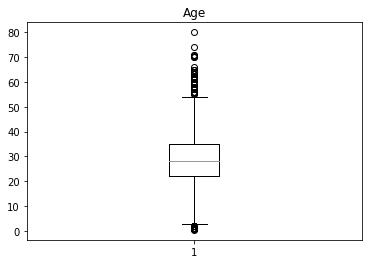

In [46]:
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()

In [47]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q2=np.percentile(data['Age'],50,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(q1,q2,q3)

22.0 28.0 35.0


In [48]:
iqr=q3-q1
low_lim=q1-1.5*iqr
up_lim=q3+1.5*iqr
print(iqr,low_lim,up_lim)


13.0 2.5 54.5


In [49]:
outlier=[]
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [50]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [51]:
len(outlier)

66

In [52]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [53]:
data['Age'].loc[ind1]=data['Age'].median()

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
data['Age'].loc[ind1]

PassengerId
12     28.0
16     28.0
34     28.0
55     28.0
95     28.0
97     28.0
117    28.0
153    28.0
171    28.0
175    28.0
196    28.0
233    28.0
253    28.0
269    28.0
276    28.0
281    28.0
327    28.0
367    28.0
439    28.0
457    28.0
468    28.0
484    28.0
488    28.0
493    28.0
494    28.0
546    28.0
556    28.0
571    28.0
588    28.0
626    28.0
627    28.0
631    28.0
648    28.0
660    28.0
673    28.0
685    28.0
695    28.0
746    28.0
773    28.0
830    28.0
852    28.0
880    28.0
Name: Age, dtype: float64

6.Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

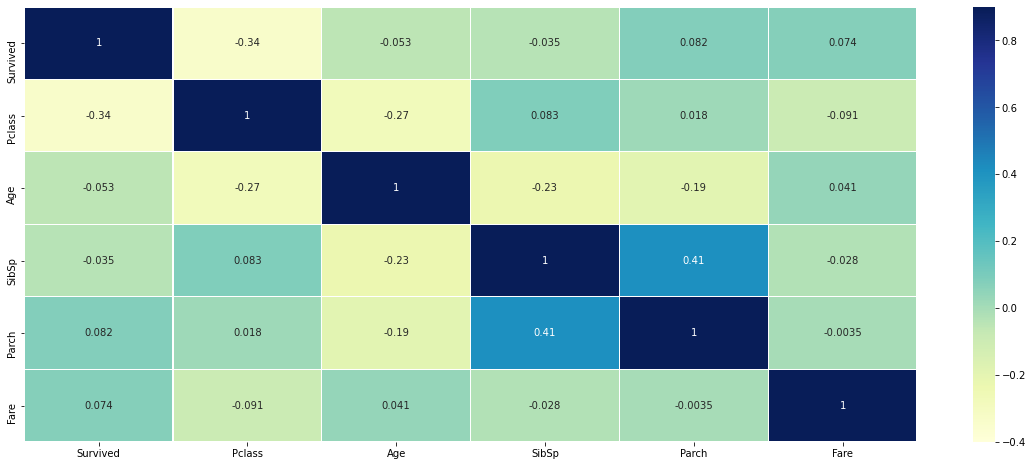

In [55]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [56]:
from sklearn import preprocessing

In [75]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [76]:
#make 'Sex'column binary
data['Sex'].replace({'female':0, 'male':1}, inplace=True)

In [80]:
Y=data['Survived']
X=data.drop(['Survived','Name', 'Age', 'Ticket', 'Embarked'],axis=1)
#target variable='Survived'
#predictors=['Pclass', 'Sex',  'SibSp', 'Parch', 'Fare']

In [81]:
X

,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,
1,3,1,1,0,263.0
2,1,0,1,0,263.0
3,3,0,0,0,263.0
4,1,0,1,0,263.0
5,3,1,0,0,263.0
...,...,...,...,...,...
887,2,1,0,0,263.0
888,1,0,0,0,263.0
889,3,0,1,2,263.0


In [82]:
Y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [83]:
#Sandardization of data using minmaxscaler 
from sklearn.preprocessing import  MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
X=pd.DataFrame(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [84]:
print(X_train)

       0    1      2         3    4
445  0.0  1.0  0.000  0.333333  0.0
650  1.0  1.0  0.000  0.000000  0.0
172  1.0  0.0  0.125  0.166667  0.0
450  0.5  1.0  0.125  0.333333  0.0
314  0.5  1.0  0.125  0.166667  0.0
..   ...  ...    ...       ...  ...
106  1.0  0.0  0.000  0.000000  0.0
270  0.0  1.0  0.000  0.000000  0.0
860  1.0  1.0  0.250  0.000000  0.0
435  0.0  0.0  0.125  0.333333  0.0
102  0.0  1.0  0.000  0.166667  0.0

[623 rows x 5 columns]


In [85]:
print(X_test)

       0    1      2         3    4
709  1.0  1.0  0.125  0.166667  0.0
439  0.5  1.0  0.000  0.000000  0.0
840  1.0  1.0  0.000  0.000000  0.0
720  0.5  0.0  0.000  0.166667  0.0
39   1.0  0.0  0.125  0.000000  0.0
..   ...  ...    ...       ...  ...
821  1.0  1.0  0.000  0.000000  0.0
633  0.0  1.0  0.000  0.000000  0.0
456  0.0  1.0  0.000  0.000000  0.0
500  1.0  1.0  0.000  0.000000  0.0
430  0.0  1.0  0.000  0.000000  0.0

[268 rows x 5 columns]


In [71]:
print(Y_train)

             Pclass                              Name  Sex   Age  SibSp  \
PassengerId                                                               
446               1         Dodge, Master. Washington    1   4.0      0   
651               3                 Mitkoff, Mr. Mito    1  28.0      0   
173               3      Johnson, Miss. Eleanor Ileen    0   1.0      1   
451               2             West, Mr. Edwy Arthur    1  36.0      1   
315               2                Hart, Mr. Benjamin    1  43.0      1   
...             ...                               ...  ...   ...    ...   
107               3  Salkjelsvik, Miss. Anna Kristine    0  21.0      0   
271               1             Cairns, Mr. Alexander    1  28.0      0   
861               3           Hansen, Mr. Claus Peter    1  41.0      2   
436               1         Carter, Miss. Lucile Polk    0  14.0      1   
103               1         White, Mr. Richard Frasar    1  21.0      0   

             Parch      

In [86]:
import sklearn
from sklearn import linear_model

In [98]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
print('MSE is: ',mean_squared_error(Y_test,predictions))
print("R squared value is :",r2_score(Y_test,predictions))

MSE is:  0.14128381115636737
R squared value is : 0.4177099642798572


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.736      0.88       0.712      0.79032258 0.82258065]
0.7881806451612904
